# Assigment 3
This assigment focuses on getting comfortable with working with multidimensional data and linear regression.
Key items include:
- Creating random n-dimensional data
- Creating a Model that can handle the data
- Plot a subset of the data along with the prediction
- Using a Dataset to read in and choose certain columns to produce a model
- Create several models from various combinations of columns
- Plot a few of the results

## 1. Create a 4 dimensional data set with 64 elements and show all 4 scatter 2D plots of the data $x_1$ vs. $y$, $x_2$ vs. $y$,  $x_3$ vs. $y$, $x_4$ vs. $y$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n = 16
x = np.linspace(0,1,n) + np.random.rand(4,n)
x = np.vstack([x, np.ones(len(x.T))]).T
y = np.linspace(0,1,n) + np.random.rand(n) - 1

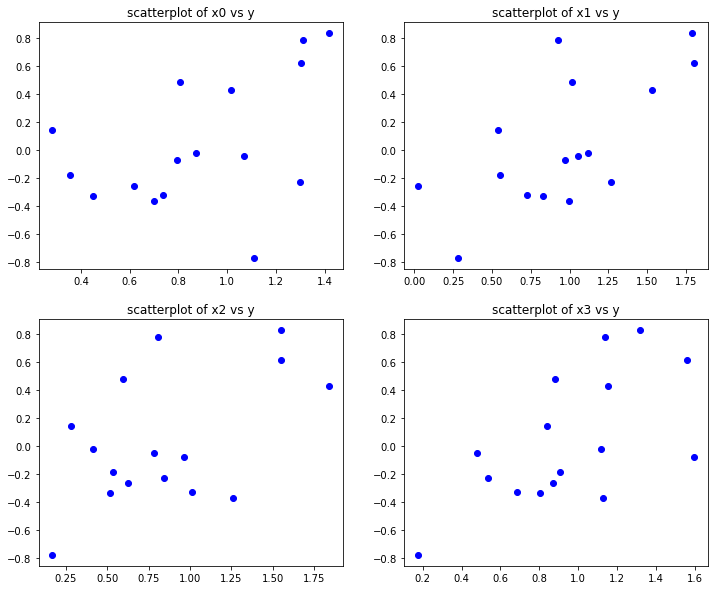

In [4]:
size_dict = {0: [(0,0)], 1:[(0,1)], 2:[(1,0)], 3:[(1,1)]}
fix, axs = plt.subplots(2,2, figsize = (12,10))
for key, place in size_dict.items():
    axs[place[0]].scatter(x.T[key],y,c="b")
    axs[place[0]].set_title(f"scatterplot of x{key} vs y")

## 2.  Create a Linear Regression model (like we did in class) to fit the data. *Use the example from Lesson 3 and do not use a library that calculates automatically*. We are expecting 5 coefficients to describe the linear model. 

## After creating the model (finding the coefficients), create a new column $y_p=\Sigma\beta_n\cdot x_n$ 

In [5]:
# beta = (left) * (right)
# left = (x.Tx)**-1, right = y.Tx
left = np.linalg.inv(np.dot(x.T,x))
right = np.dot(y.T,x)
beta = np.dot(left, right)
beta

array([ 0.31135125,  0.35741362, -0.15671635,  0.57876324, -0.99221925])

In [6]:
pred = np.dot(x,beta)

## 3. Plot the model's prediction as a different color on top of the scatter plot from Q1 in 2D for all 4 of the dimensions ($x_1 \rightarrow y_p, x_2 \rightarrow y_p, x_3 \rightarrow y_p, x_4 \rightarrow y_p$) 

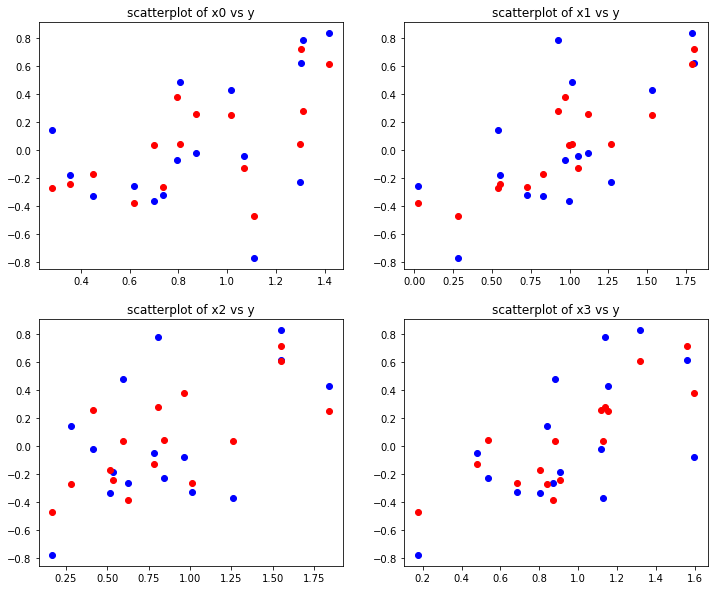

In [7]:
fix, axs = plt.subplots(2,2, figsize = (12,10))
for key, place in size_dict.items():
    axs[place[0]].scatter(x.T[key],y,c="b")
    axs[place[0]].scatter(x.T[key],pred,c="r")
    axs[place[0]].set_title(f"scatterplot of x{key} vs y")

## 4. Read in `mlnn/data/Credit.csv` with Pandas and build a Linear Regression model to predict Credit Rating (`Rating`). Use only the numeric columns in your model, but feel free to experiment which which columns you believe are better predicters of Credit Rating (Column `Rating`)

In [8]:
import pandas as pd
import numpy as np
credit = pd.read_csv('../data/Credit.csv')
credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


## Choose multiple columns as inputs beyond `Income` and `Limit` but clearly, don't use `Rating`

In [35]:
columns = ['Income', 'Limit', 'Cards', 'Age', 'Education','Balance']
X = credit[columns].values

X = np.vstack([X.T, np.ones(len(X))]).T
X

array([[1.48910e+01, 3.60600e+03, 2.00000e+00, ..., 1.10000e+01,
        3.33000e+02, 1.00000e+00],
       [1.06025e+02, 6.64500e+03, 3.00000e+00, ..., 1.50000e+01,
        9.03000e+02, 1.00000e+00],
       [1.04593e+02, 7.07500e+03, 4.00000e+00, ..., 1.10000e+01,
        5.80000e+02, 1.00000e+00],
       ...,
       [5.78720e+01, 4.17100e+03, 5.00000e+00, ..., 1.20000e+01,
        1.38000e+02, 1.00000e+00],
       [3.77280e+01, 2.52500e+03, 1.00000e+00, ..., 1.30000e+01,
        0.00000e+00, 1.00000e+00],
       [1.87010e+01, 5.52400e+03, 5.00000e+00, ..., 7.00000e+00,
        9.66000e+02, 1.00000e+00]])

In [36]:
y = credit['Rating']
y

0      283
1      483
2      514
3      681
4      357
      ... 
395    307
396    296
397    321
398    192
399    415
Name: Rating, Length: 400, dtype: int64

### 5. Plot your results using scatter plots (just like in class). Show as many of your columns vs. credit rating that you can.

In [39]:
new_dict = {0: [(0,0)], 1:[(0,1)], 2:[(1,0)], 3:[(1,1)], 4:[(2,0)], 5:[(2,1)]}
for key, value in new_dict.items():
    new_dict[key].append(columns[key])
new_dict

{0: [(0, 0), 'Income'],
 1: [(0, 1), 'Limit'],
 2: [(1, 0), 'Cards'],
 3: [(1, 1), 'Age'],
 4: [(2, 0), 'Education'],
 5: [(2, 1), 'Balance']}

In [44]:
beta = np.linalg.lstsq(X,y)[0]
print(f"Solver: {beta}")
left = np.linalg.inv(np.dot(X.T,X))
right = np.dot(y.T,X)
beta = np.dot(left, right)
print(f"Derived: {beta}")

Solver: [ 9.48157743e-02  6.42304413e-02  4.67706085e+00  8.06617460e-03
 -2.30863025e-01  8.18115721e-03  3.10522106e+01]
Derived: [ 9.48157743e-02  6.42304413e-02  4.67706085e+00  8.06617460e-03
 -2.30863025e-01  8.18115721e-03  3.10522106e+01]


C:\Users\gdlev\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [45]:
pred = np.dot(X,beta)

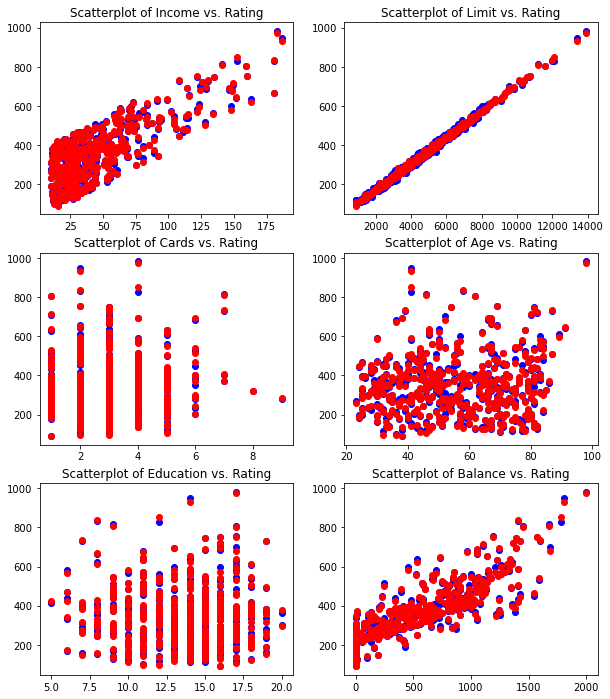

In [46]:
fig, axs = plt.subplots(3,2, figsize = (10,12))
for key, value in new_dict.items():
    axs[value[0]].scatter(X[:,key],y, c="b")
    axs[value[0]].scatter(X[:,key],pred, c="r")
    axs[value[0]].set_title(f"Scatterplot of {value[1]} vs. Rating")
